# Network Analysis and Community Extraction of Google Plus Network
#### Authors: Justin Luong, James Nguyen, Kenny Dang

### Import the data
##### We got our dataset from SNAP

In [1]:
import pandas as pd
import requests
import networkx as nx
import matplotlib.pyplot as plt
#import cairoccffi
#import igraph

def ReadFile(file):
    somefile = open(file, 'r')

    content = somefile.readlines()
    a = []

    for line in content:
        b = line.split(' ')
        if str(b).isdigit():
            a.append(b)

        else:
            b = b[:-2]
        a.append(b)
    
    return a


In [2]:

class Nodes:
    def __init__(self, edges_file):
        self.graph = nx.read_edgelist(edges_file, data=False)
        self.gender = ''
        self.job = ''
        self.position = ''

    def print(self):

        plt.figure(3,figsize=(24, 12))
        nx.draw_networkx(self.graph, with_labels=False)
        plt.show()




In [3]:
gplusFeats = ReadFile('gplusFeat.feat')
len(gplusFeats)

1692

In [4]:
"""
In this cell we take the edges file
and get each line in an array, then
append that array (containing the current line)
to another array that holds all lines in the file
"""

EdgeFile = open('gplusEdges.edges')
test = []
EdgeStuff = EdgeFile.readlines()

for numbers in EdgeStuff:
    temp = numbers.split(' ')
    test.append(temp)
    
for i in range(len(test)):
    test[i][-1] = test[i][-1][:-1]
#EdgeList = ReadFile('gplusEdges.edges')

print(test[0])


['116374117927631468606', '101765416973555767821']


#### Here we can see that the values of the Google Plus nodes is too large for Python to interpret so we had to implement a method that instead ties each node to its array index location

In [5]:
"""
In this cell we are tracking each
node and replacing it with a 
smaller integer value
"""  
ValueTracker = []


#Get first 2 numbers in ValueTracker
AExists = True
BExists = True
#For every row in test    
for i in range(len(test)):
    #For each number of each row
    a = test[i][0]
    b = test[i][1]
    for shit in ValueTracker:
        if a == shit:
            AExists = True
        if b == shit:
            BExists = True

    if AExists == False:
        ValueTracker.append(a)
    if BExists == False:
        ValueTracker.append(b)

    AExists = False
    BExists = False
    
print(ValueTracker)

['112188647432305746617', '107727150903234299458', '116719211656774388392', '100432456209427807893', '117421021456205115327', '101096322838605097368', '116407635616074189669', '113556266482860931616', '105706178492556563330', '111169963967137030210', '107527001343993112621', '110877363259509543172', '105513412023818293063', '115710735637044108808', '108736646334864181044', '112393248315358692010', '108683283643126638695', '107111579950257773726', '103743296950120157401', '103583604759580854844', '113838352498860544569', '118299777136505117634', '106027609527831583580', '108322543021146059132', '100814778216375933054', '106558284273162270526', '115478779964227301239', '108396103565552463387', '104987932455782713675', '106862156479660675047', '113222062708936891262', '115221898088173734174', '107026299993226528916', '101692096009250888838', '109043804130056015419', '108443027359212340995', '109412257237874861202', '101650411383078099702', '112579116320573535497', '115459243651688775505',

In [6]:
for i in range(len(test)):
    for j in range(len(ValueTracker)):
        if test[i][0] == ValueTracker[j]:
            test[i][0] = j
        elif test[i][1] == ValueTracker[j]:
            test[i][1] = j

for i in range(5):
    print(test[i])

[523, 622]
[0, 1]
[2, 3]
[4, 5]
[6, 7]


In [7]:
with open('TEMP.txt', 'w') as OUTfile:
    for i in range(len(test)):
        OUTfile.write(f"{test[i][0]} {test[i][1]}\n")

# Plot of the overall network
#### Here is a basic plot of the network before we do any analysis of it

In [8]:
G = nx.read_edgelist('TEMP.txt', data=False)

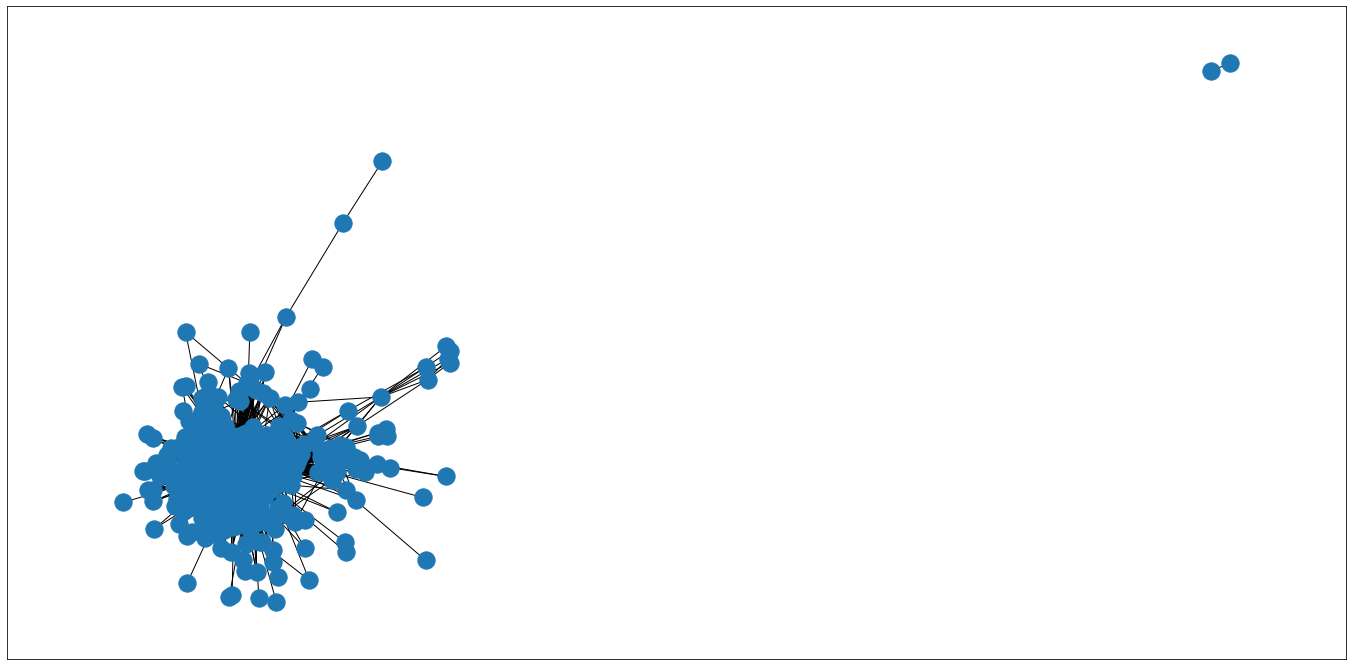

In [9]:
plt.figure(3,figsize=(24, 12))
nx.draw_networkx(G, with_labels=False)
plt.show()


# Begin Analysis of Google Plus Network
#### First compute the edge density. Edge density describes the portion of the potential connections in a network that are actual connections. A “potential connection” is a connection that could potentially exist between two “nodes” but doesn't actually have to.
#### Source: https://www.the-vital-edge.com/what-is-network-density/

In [10]:
density = nx.density(G)

print('The edge density is: ' + str(density))

The edge density is: 0.11155778525093261


#### Below we compute the centrality of the network. What the centrality tells us is the ammount of of social connections with a node. This is to be used with the average degree that we compute in the next cell

In [11]:
degree_centrality = nx.degree_centrality(G)

avg_degree_centrality = 0
for value in degree_centrality.values():
    avg_degree_centrality += value

avg_degree_centrality = avg_degree_centrality / len(degree_centrality)
print("Average degree centrality", avg_degree_centrality)


eigen_centrality = nx.eigenvector_centrality(G)

avg_eigen_centrality = 0
for value in eigen_centrality.values():
    avg_eigen_centrality += value

avg_eigen_centrality = avg_eigen_centrality / len(eigen_centrality)
print("Average eigenvector centrality", avg_eigen_centrality)


between_centrality = nx.betweenness_centrality(G)

avg_between = 0
for value in between_centrality.values():
    avg_between += value

avg_between = avg_between / len(between_centrality)
print("Average betweeness centrality", avg_between)


close_centrality = nx.closeness_centrality(G)

avg_closeness = 0
for value in close_centrality.values():
    avg_closeness += value

avg_closeness = avg_closeness / len(close_centrality)
print("Average closeness centrality", avg_closeness)

print("Top 10 Degree Centrality:")
for k, v in sorted(degree_centrality.items(), key=lambda x: -x[1])[:10]:
    print(str(k)+":"+"{:.3}".format(v)+" ", end="")
    print("\n")

print("Top 10 Eigenvector Centrality:")
for k, v in sorted(eigen_centrality.items(), key=lambda x: -x[1])[:10]:
    print(str(k)+":"+"{:.3}".format(v)+" ", end="")
    print("\n")

print("Top 10 Between Centrality:")
for k, v in sorted(between_centrality.items(), key=lambda x: -x[1])[:10]:
    print(str(k)+":"+"{:.3}".format(v)+" ", end="")
    print("\n")

print("Top 10 Closeness Centrality:")
for k, v in sorted(close_centrality.items(), key=lambda x: -x[1])[:10]:
    print(str(k)+":"+"{:.3}".format(v)+" ", end="")
    print("\n")



Average degree centrality 0.11155778525093407
Average eigenvector centrality 0.018093276983147753
Average betweeness centrality 0.0006261994975513623
Average closeness centrality 0.498058851983164
Top 10 Degree Centrality:
384:0.574 

29:0.536 

181:0.523 

776:0.514 

6:0.511 

627:0.503 

23:0.498 

125:0.492 

234:0.489 

437:0.489 

Top 10 Eigenvector Centrality:
384:0.0768 

29:0.0732 

627:0.0728 

437:0.0712 

181:0.0707 

23:0.0704 

100:0.07 

224:0.0695 

539:0.0693 

234:0.0692 

Top 10 Between Centrality:
11:0.0233 

806:0.0228 

134:0.017 

776:0.0159 

6:0.0145 

206:0.0132 

224:0.0125 

384:0.0119 

416:0.0115 

257:0.0113 

Top 10 Closeness Centrality:
384:0.69 

29:0.672 

181:0.667 

776:0.661 

6:0.66 

627:0.659 

23:0.655 

125:0.652 

437:0.651 

142:0.649 



#### Next we compute the degree of the network. We calculated the average degree along with the degree distribution. The degree distribution tells us the difference in the degree of connectivity between the nodes of network. In other words, it tells us whether or not the nodes in the graph have the roughly the same ammount of the connections or if some nodes have many connections while others have few

In [12]:
degree = G.degree()

degree_list = []

for (n,d) in degree:
    degree_list.append(d)

av_degree = sum(degree_list) / len(degree_list)

print('The average degree is ' + str(av_degree))

The average degree is 183.9587878787879


Text(0.5, 1.0, 'Google Plus: Node Degree')

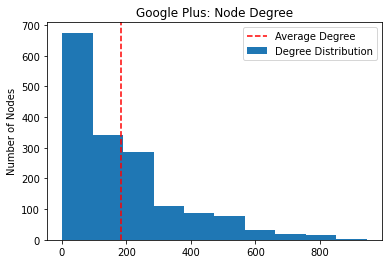

In [13]:
plt.hist(degree_list,label='Degree Distribution')
plt.axvline(av_degree,color='r',linestyle='dashed',label='Average Degree')
plt.legend()
plt.ylabel('Number of Nodes')
plt.title('Google Plus: Node Degree')

#### Next we compute the local clustering coefficient. This is the degree to which nodes in a graph tend to cluster together. The higher the clustering coefficient the more tightly knit the nodes are with other memebers of the network. 

In [14]:
local_clustering_coefficient = nx.algorithms.cluster.clustering(G)

#lets find the average clustering coefficient
av_local_clustering_coefficient = sum(local_clustering_coefficient.values())/len(local_clustering_coefficient)
print('The average clustering coefficient is ' + str(av_local_clustering_coefficient))

The average clustering coefficient is 0.5173352460921905


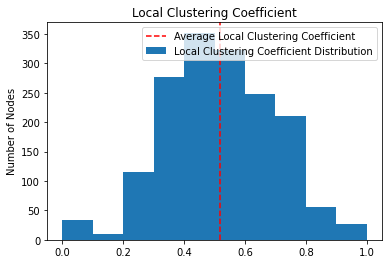

In [15]:
local_clustering_coefficient = nx.algorithms.cluster.clustering(G)

#lets find the average clustering coefficient
av_local_clustering_coefficient = sum(local_clustering_coefficient.values())/len(local_clustering_coefficient)

#similarly to the degree lets plot the local clustering coefficient distribution
plt.hist(local_clustering_coefficient.values(),label='Local Clustering Coefficient Distribution')
plt.axvline(av_local_clustering_coefficient,color='r',linestyle='dashed',label='Average Local Clustering Coefficient')
plt.legend()
plt.ylabel('Number of Nodes')
plt.title('Local Clustering Coefficient')
plt.show()

#### In the segment of code below you can see the clustering coefficent of each individual node

In [16]:
Gclusters = nx.clustering(G)
print(Gclusters)

{'523': 0.3704841228526809, '622': 0.4510939510939511, '0': 0.39405550290422175, '1': 0.25667473468627816, '2': 0.44357743097238894, '3': 0.6898570302825622, '4': 0.41047507788161997, '5': 0.5027027027027027, '6': 0.20440263118502178, '7': 0.4570166496772001, '8': 0.3561073073268195, '9': 0.37778070290904303, '10': 0.4290369792174846, '11': 0.2852863031096359, '12': 0.46165856001921574, '13': 0.35531872396279174, '14': 0.3921885803820072, '15': 0.6827790202727076, '16': 0.4640133779264214, '17': 0.41142062894538717, '18': 0.3815004262574595, '19': 0.4977538185085355, '20': 0.3363605091159271, '21': 0.46206085934439073, '22': 0.2573175839825752, '23': 0.2597242102829912, '24': 0.8906122448979592, '25': 0.2736413584120231, '26': 0.5327700972862264, '27': 0.36632747456059206, '28': 0.3562251306390527, '29': 0.24325238414905992, '30': 0.8401496925955627, '31': 0.27039599794286784, '32': 0.47124538143881767, '33': 0.3785220069190313, '34': 0.6868908164177769, '35': 0.30049843710399593, '36'

#### Now we perform community extraction and detect how many communities are in the Google Plus network. In the network we detected that there are 6 communities

In [17]:
from networkx.algorithms.community.modularity_max import greedy_modularity_communities

#preform the community detection
c = list(greedy_modularity_communities(G))

#Let's find out how many communities we detected
print("There are a total of", len(c), "communities")

There are a total of 6 communities


#### Below is a list of all the nodes that belong to each of the 6 communities. The communities go in order from largest to smallest with 0 being the largest and 3, 4, and 5 being the smallest communities

In [18]:
community_0 = sorted(c[0])
community_1 = sorted(c[1])
community_2 = sorted(c[2])
community_3 = sorted(c[3])
community_4 = sorted(c[4])
community_5 = sorted(c[5])

print("Community 0:", community_0)
print("Community 1:", community_1)
print("Community 2:", community_2)
print("Community 3:", community_3)
print("Community 4:", community_4)
print("Community 5:", community_5)

Community 0: ['1000', '1001', '1002', '1003', '1004', '1005', '1006', '1007', '1009', '101', '1010', '1011', '1012', '1014', '1015', '1016', '1017', '1018', '102', '1023', '1024', '1026', '1027', '1029', '103', '1030', '1031', '1035', '1036', '1037', '1038', '1039', '1042', '1043', '1044', '1047', '1048', '1050', '1051', '1052', '1056', '1060', '1064', '1065', '1066', '1068', '1069', '1070', '1071', '1073', '1074', '1076', '1081', '1083', '1084', '1085', '1086', '1087', '1092', '1093', '1094', '1096', '1097', '1098', '1099', '11', '1100', '1103', '1104', '1105', '1106', '1107', '1108', '1109', '111', '1110', '1111', '1112', '1117', '1118', '1119', '1121', '1123', '1125', '1126', '1128', '1129', '1130', '1131', '1132', '1133', '1134', '1138', '1140', '1142', '1143', '1144', '1145', '1147', '1149', '1151', '1152', '1154', '1155', '1156', '1157', '116', '1161', '1162', '1163', '1167', '1168', '1169', '117', '1170', '1171', '1172', '1173', '1174', '1175', '1176', '1178', '1179', '118', '11

#### Here is a visualizartion of the netwrok in a kamada kawai layout with each communuty being indicated by the color of the node. As you can see there are 6 different colors which mathches the results of our community detection algorithm

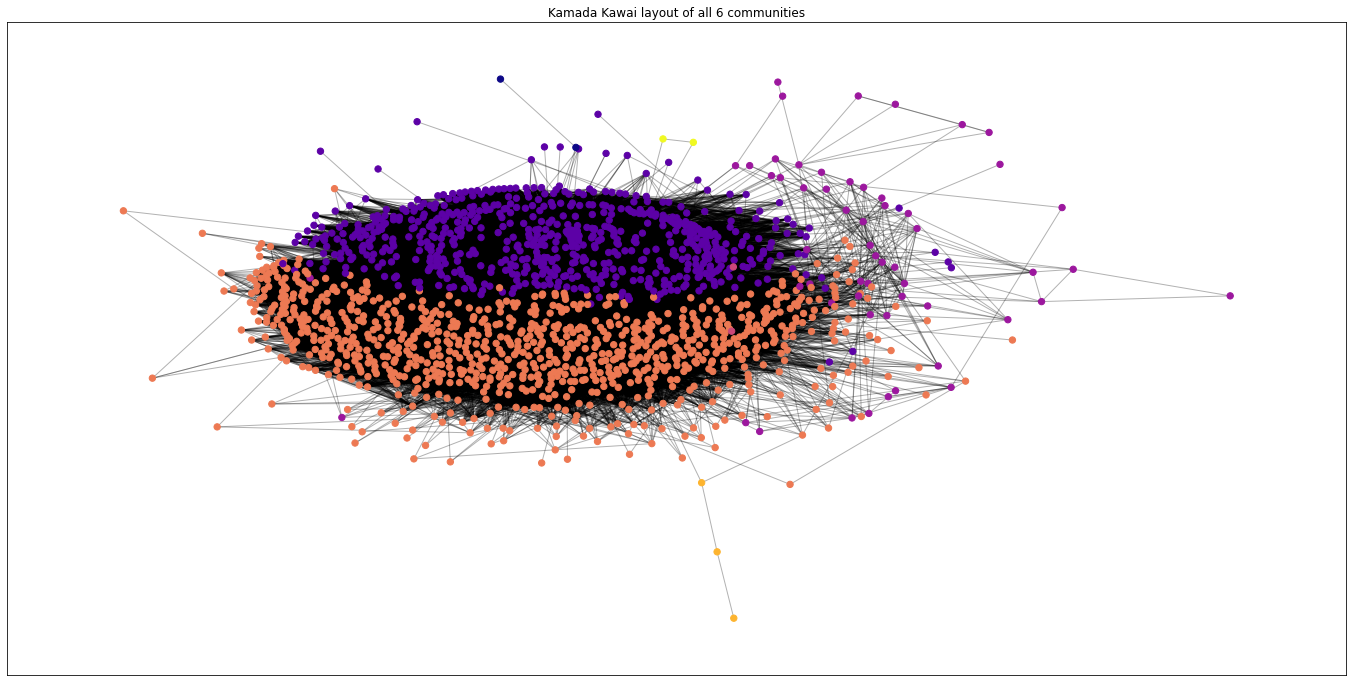

In [19]:
import matplotlib.cm as cm
from community import community_louvain

plt.figure(3,figsize=(24, 12))
circ_pos = nx.kamada_kawai_layout(G)

partition = community_louvain.best_partition(G)
partition = community_louvain.best_partition(G)

cmap = cm.get_cmap('plasma', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, circ_pos, partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values()))

#now we can add edges to the drawing 
nx.draw_networkx_edges(G, circ_pos, alpha = 0.3)

plt.title("Kamada Kawai layout of all 6 communities")
plt.show()

#### Here is another representation of the same netwrok with the communities in a spring layout

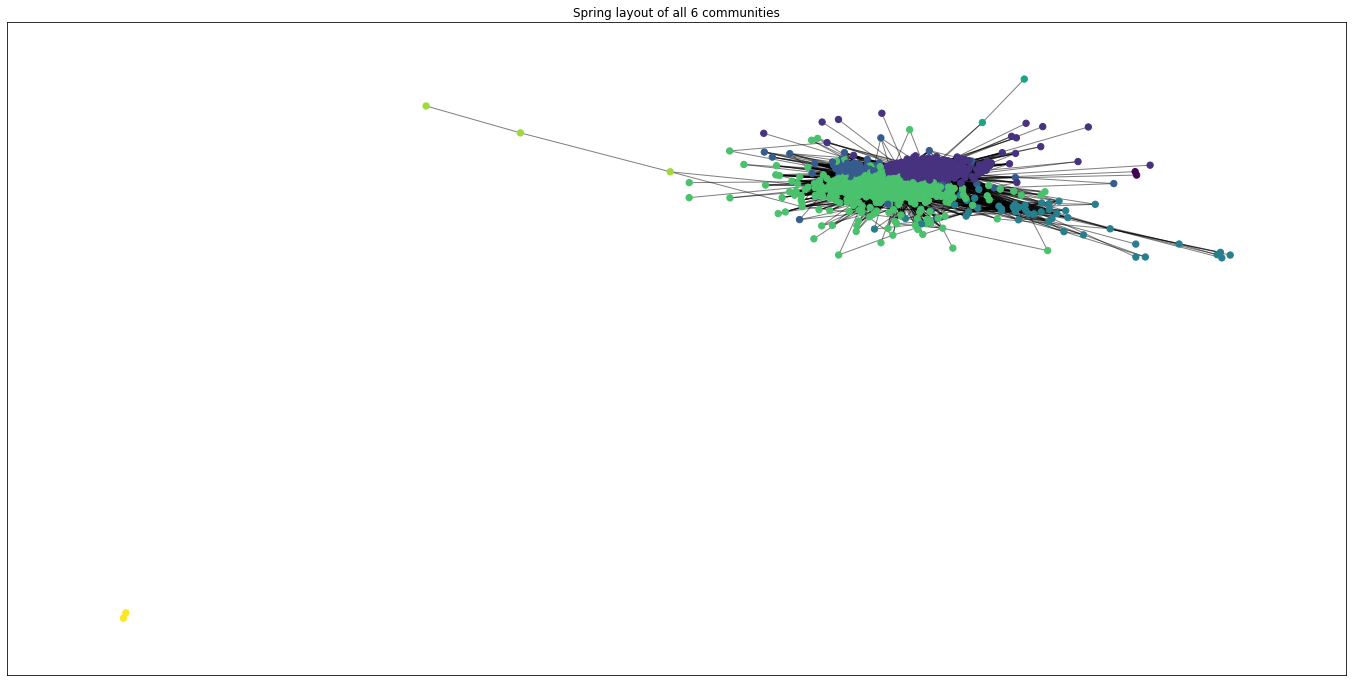

In [20]:
from community import community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

plt.figure(3,figsize=(24, 12))
#computes the best partition
partition = community_louvain.best_partition(G)
partition = community_louvain.best_partition(G)

pos = nx.spring_layout(G)

#draws the graph
plt.figure(3,figsize=(24, 12))
#to color the nodes according to the partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha = 0.5)
#print partition
plt.title("Spring layout of all 6 communities")
plt.show()

#### Now we tried to print out each individual community which we were successfully able to do however we were not able to print out the correct edges for the individual communities

<Figure size 432x288 with 0 Axes>

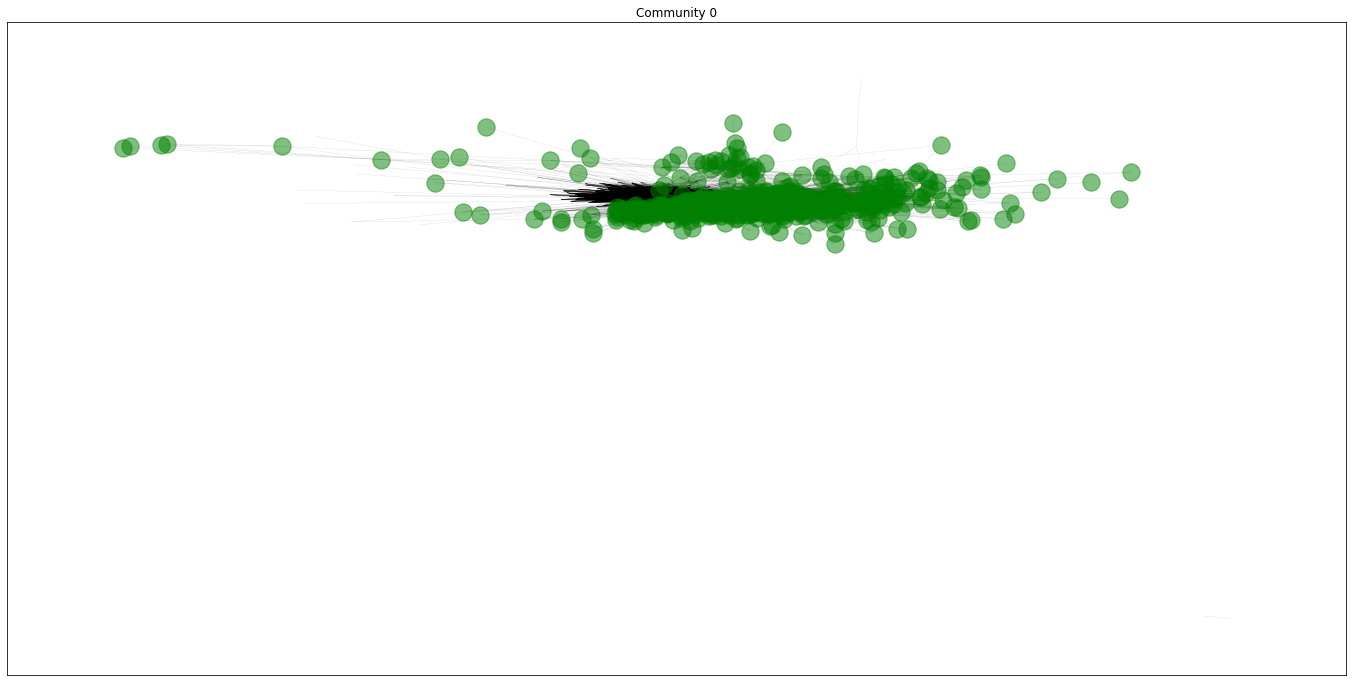

In [21]:
plt.clf()
plt.figure(3,figsize=(24, 12))
nx.draw_networkx(G, nodelist=community_0, width=0.1, node_color='g', alpha=0.5,  with_labels=False)
plt.title("Community 0")
plt.show()

<Figure size 432x288 with 0 Axes>

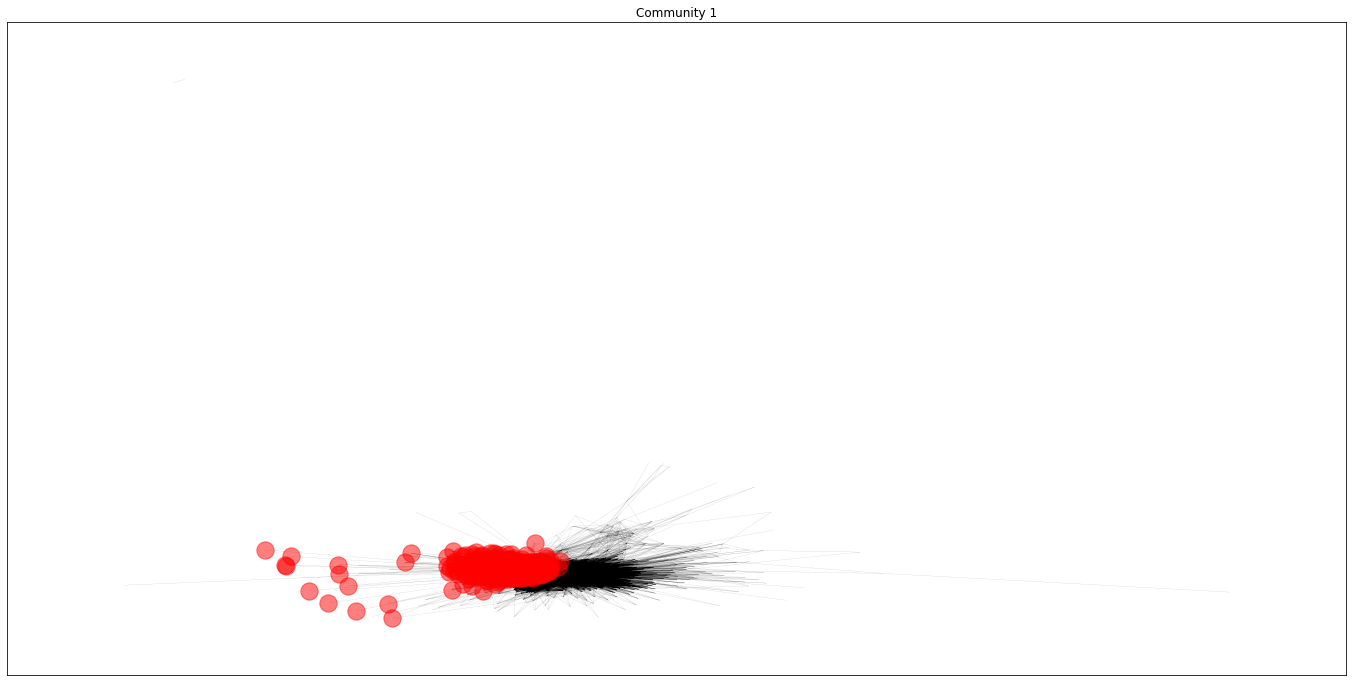

In [22]:
plt.clf()
plt.figure(3,figsize=(24, 12))
nx.draw_networkx(G, nodelist=community_1, width=0.1, node_color='r', alpha=0.5,  with_labels=False)
plt.title("Community 1")
plt.show()

<Figure size 432x288 with 0 Axes>

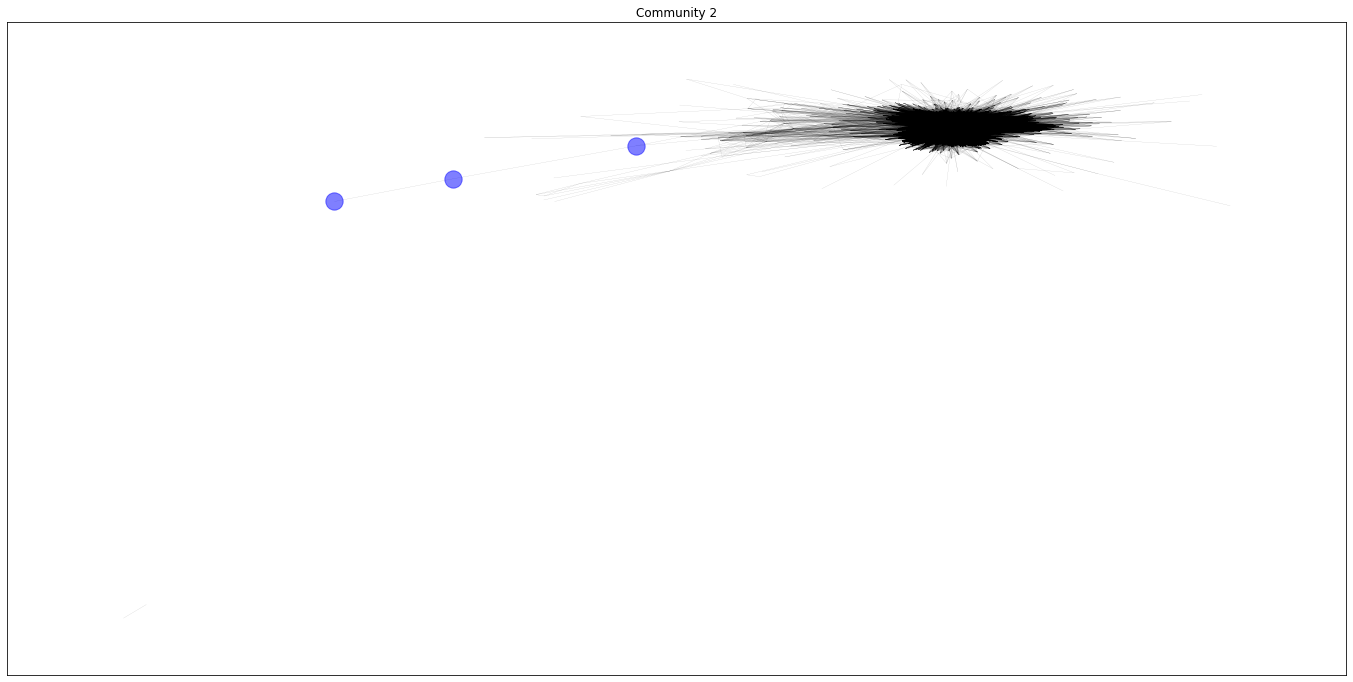

In [23]:
plt.clf()
plt.figure(3,figsize=(24, 12))
nx.draw_networkx(G, nodelist=community_2, width=0.1, node_color='b', alpha=0.5,  with_labels=False)
plt.title("Community 2")
plt.show()

<Figure size 432x288 with 0 Axes>

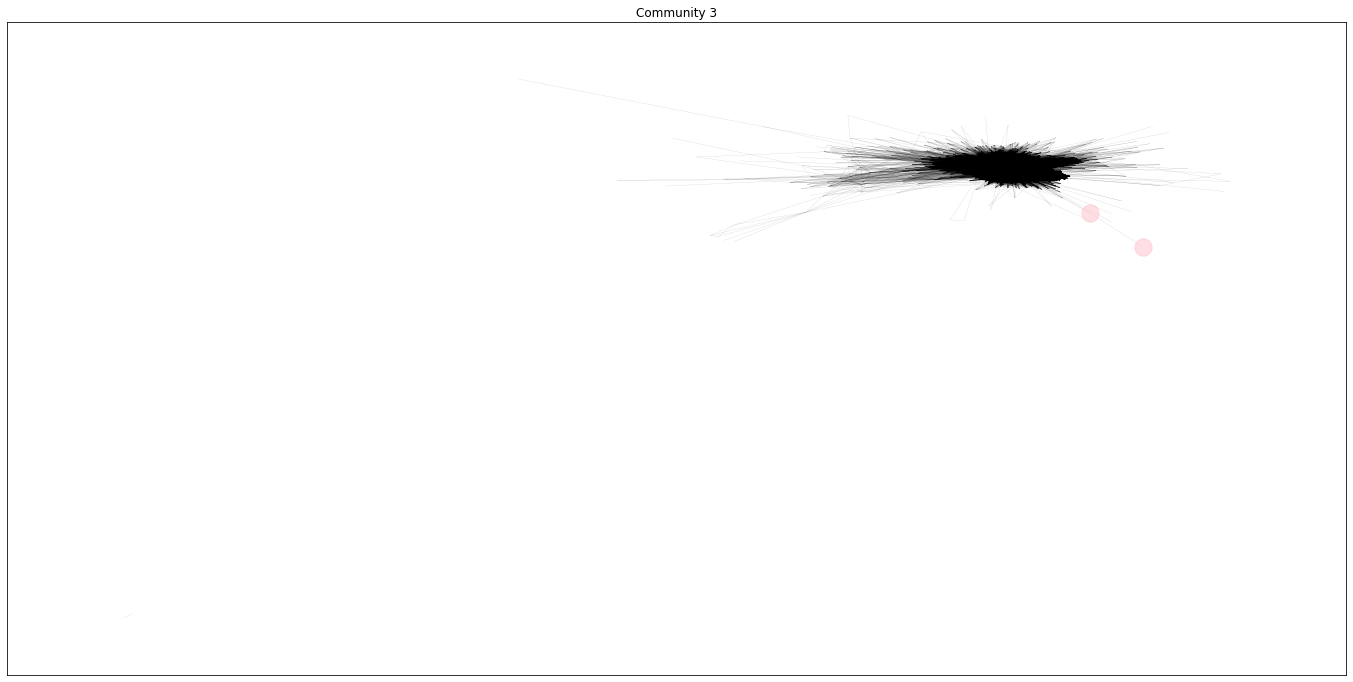

In [24]:
plt.clf()
plt.figure(3,figsize=(24, 12))
nx.draw_networkx(G, nodelist=community_3, width = .1, node_color='pink', alpha=0.5, with_labels=False)
plt.title("Community 3")
plt.show()

<Figure size 432x288 with 0 Axes>

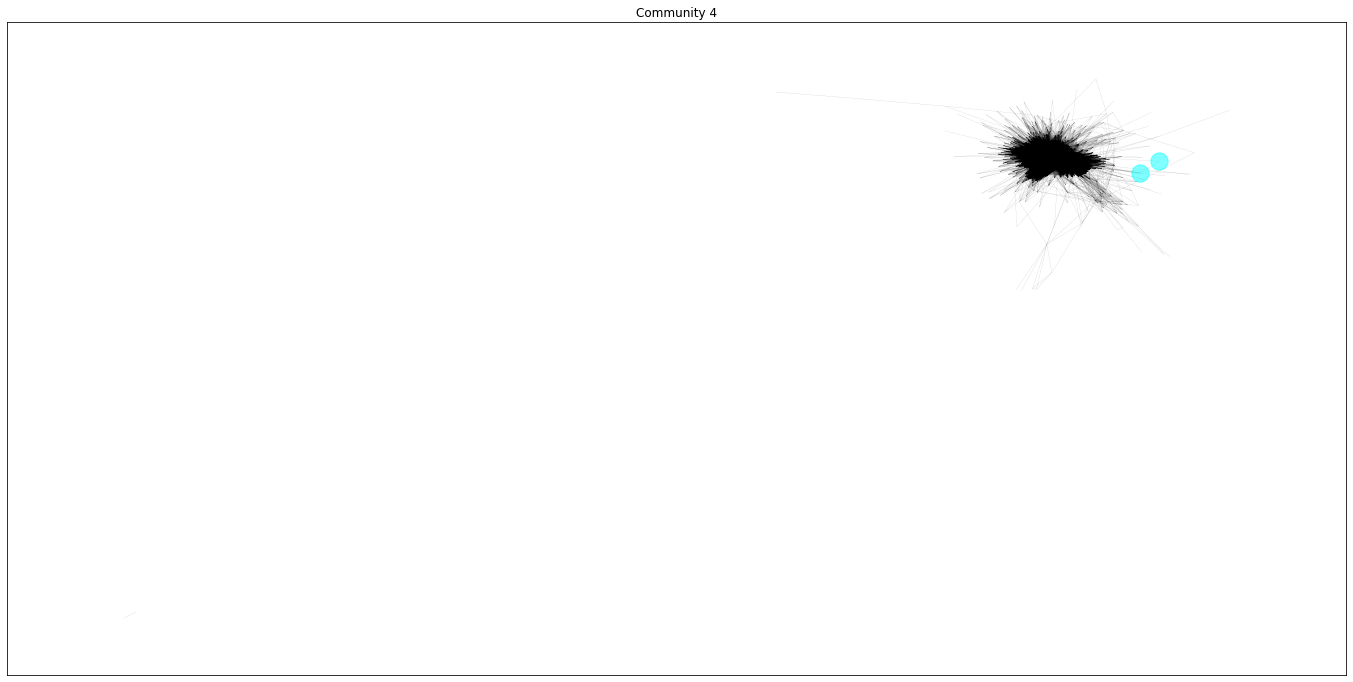

In [25]:
plt.clf()
plt.figure(3,figsize=(24, 12))
nx.draw_networkx(G, nodelist=community_4, width = .1, node_color='cyan', alpha=0.5, with_labels=False)
plt.title("Community 4")
plt.show()

<Figure size 432x288 with 0 Axes>

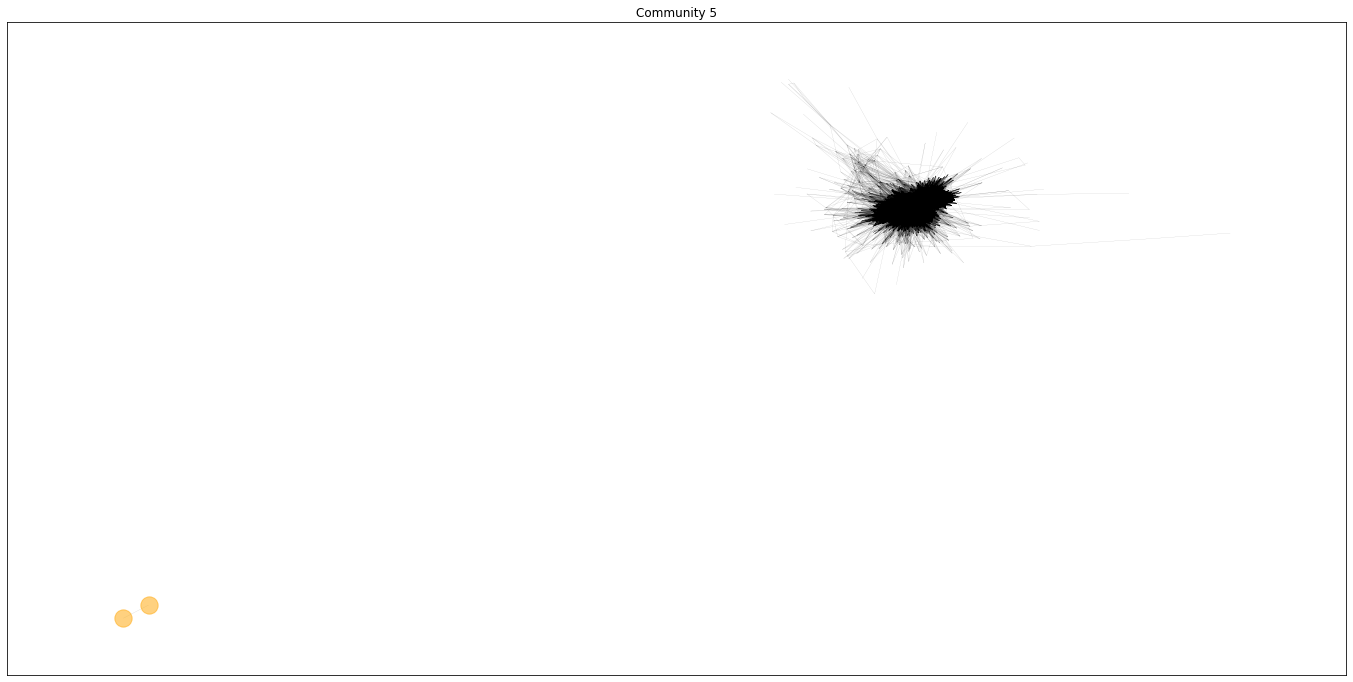

In [26]:
plt.clf()
plt.figure(3,figsize=(24, 12))
nx.draw_networkx(G, nodelist=community_5, width = .1, node_color='orange', alpha=0.5, with_labels=False)
plt.title("Community 5")
plt.show()

#### Below we attempted to use a more advanced graphing tool that utilizes a library called netgraph. It is supposed to show the communites along along with their proportional sizes and stength of the community based on the thickness of the edges. However, we were not able to implement it fully 

In [27]:
'''
import matplotlib.pyplot as plt
import networkx as nx

# installation easiest via pip:
# pip install netgraph
from netgraph import Graph

plt.figure(3,figsize=(24, 12))
partition_sizes = [10, 20, 30, 40]
g = nx.random_partition_graph(partition_sizes, 0.5, 0.1)

# # alternatively, we can infer the best partition using Louvain:
node_to_community = community_louvain.best_partition(g)
node = 0

for community_id, size in enumerate(partition_sizes):
    for _ in range(size):
        node_to_community[node] = community_id
        node += 1

community_to_color = {
    0 : 'tab:blue',
    1 : 'tab:orange',
    2 : 'tab:green',
    3 : 'tab:red',
    4 : 'tab:pink',
    5 : 'tab:purple',
}
node_color = {node: community_to_color[community_id] for node, community_id in node_to_community.items()}

Graph(g,
      node_color=node_color, node_edge_width=0, edge_alpha=0.1,
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community),
      edge_layout='bundled', edge_layout_kwargs=dict(k=2000),
)

plt.show()
'''

"\nimport matplotlib.pyplot as plt\nimport networkx as nx\n\n# installation easiest via pip:\n# pip install netgraph\nfrom netgraph import Graph\n\nplt.figure(3,figsize=(24, 12))\npartition_sizes = [10, 20, 30, 40]\ng = nx.random_partition_graph(partition_sizes, 0.5, 0.1)\n\n# # alternatively, we can infer the best partition using Louvain:\nnode_to_community = community_louvain.best_partition(g)\nnode = 0\n\nfor community_id, size in enumerate(partition_sizes):\n    for _ in range(size):\n        node_to_community[node] = community_id\n        node += 1\n\ncommunity_to_color = {\n    0 : 'tab:blue',\n    1 : 'tab:orange',\n    2 : 'tab:green',\n    3 : 'tab:red',\n    4 : 'tab:pink',\n    5 : 'tab:purple',\n}\nnode_color = {node: community_to_color[community_id] for node, community_id in node_to_community.items()}\n\nGraph(g,\n      node_color=node_color, node_edge_width=0, edge_alpha=0.1,\n      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community),\n  